In [16]:
import matplotlib.pyplot as plt
import numpy as np


# Define the function
def f(x):
    return x**4 - 3 * x**3 - x**2 + 7 * x - 3


def df(x):
    # Derivative of the function
    return 4 * x**3 - 9 * x**2 - 2 * x + 7


In [17]:
# Find the roots of df(x) = 4x³ - 9x² - 2x + 7
# The coefficients are in descending order of powers: [4, -9, -2, 7]
coefficients = [4, -9, -2, 7]

# Find roots using numpy (assuming all roots are real)
roots_df = np.roots(coefficients)

print("Roots of df(x) = 4x³ - 9x² - 2x + 7:")
print("=" * 40)

for i, root in enumerate(roots_df):
    print(f"Root {i + 1}: x = {root:.6f}")
    print(f"  Verification: df({root:.6f}) = {df(root):.10f}")
    print()

print(f"All roots of df(x): {roots_df}")
print(f"Number of roots: {len(roots_df)}")

Roots of df(x) = 4x³ - 9x² - 2x + 7:
Root 1: x = 2.088087
  Verification: df(2.088087) = -0.0000000000

Root 2: x = -0.838087
  Verification: df(-0.838087) = -0.0000000000

Root 3: x = 1.000000
  Verification: df(1.000000) = -0.0000000000

All roots of df(x): [ 2.08808749 -0.83808749  1.        ]
Number of roots: 3


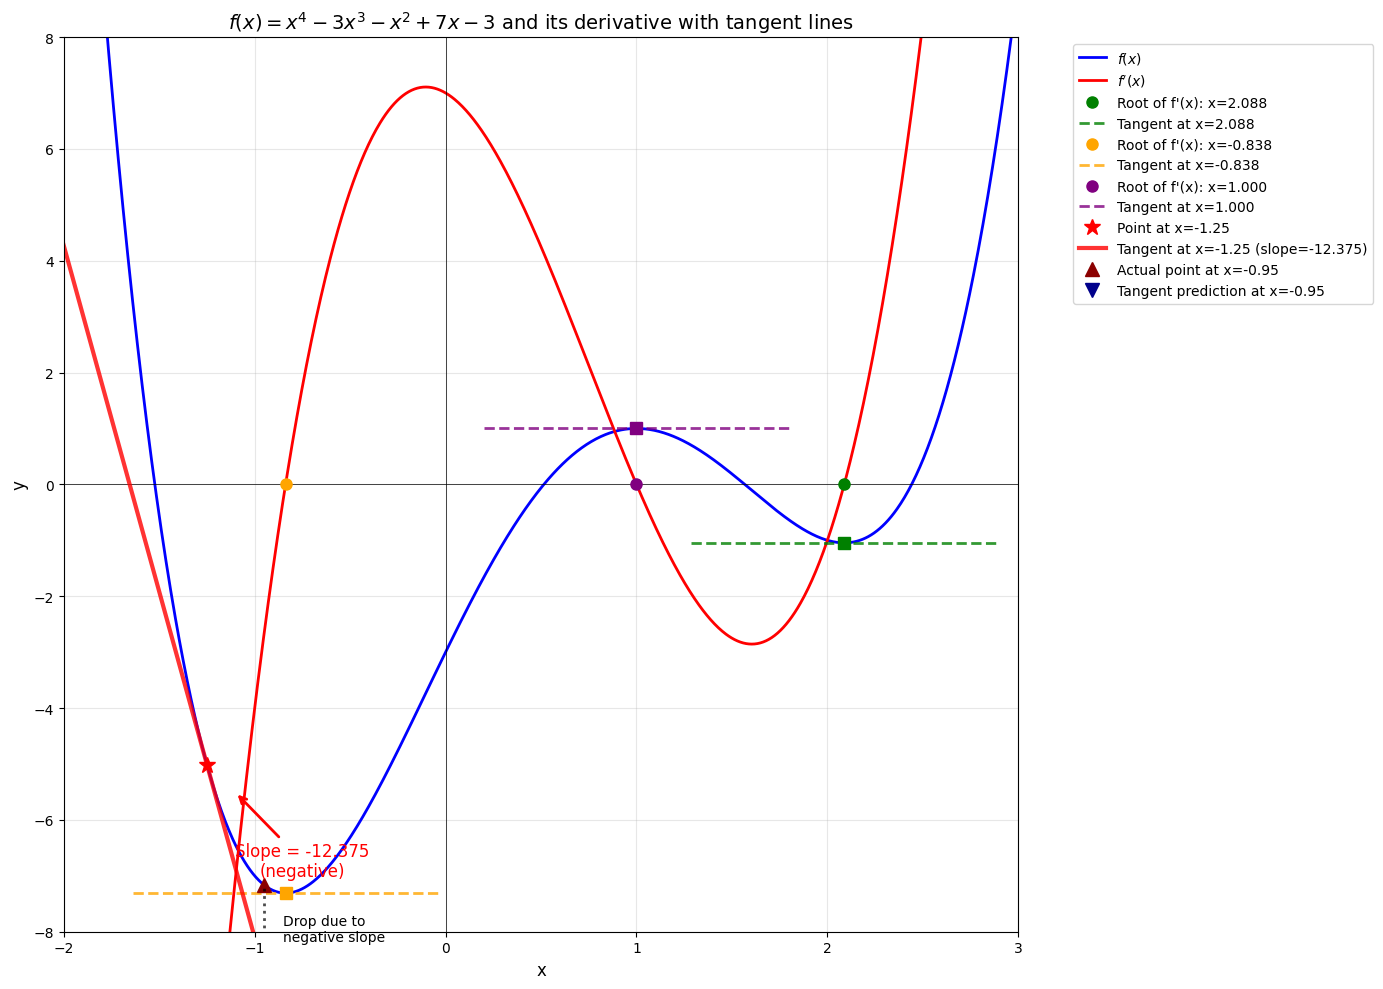

Roots of df(x) and corresponding tangent lines:
Root 1: x = 2.088087
  f(2.088087) = -1.045813
  f'(2.088087) = -0.0000000000
  Tangent line: y = -1.045813 (horizontal line)

Root 2: x = -0.838087
  f(-0.838087) = -7.309656
  f'(-0.838087) = -0.0000000000
  Tangent line: y = -7.309656 (horizontal line)

Root 3: x = 1.000000
  f(1.000000) = 1.000000
  f'(1.000000) = -0.0000000000
  Tangent line: y = 1.000000 (horizontal line)


Tangent line demonstration at x = -1.25:
Point: x = -1.25
f(-1.25) = -5.011719
f'(-1.25) = -12.375000 (negative slope)
Tangent line equation: y = -5.011719 + -12.375000(x - -1.25)

Stepping right by 0.3:
New x: -0.95
Actual f(-0.95) = -7.165869
Tangent prediction: -8.724219
The negative slope causes the tangent line to go down as we move right.


In [18]:
# Create x values
x = np.linspace(-2, 3, 1000)
fx = f(x)
dfx = df(x)

# Create the plot
plt.figure(figsize=(14, 10))
plt.plot(x, fx, "b-", linewidth=2, label=r"$f(x)$")
plt.plot(x, dfx, "r-", linewidth=2, label=r"$f^\prime(x)$")

# Add grid and axes
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color="k", linewidth=0.5)
plt.axvline(x=0, color="k", linewidth=0.5)

# Mark the roots of df(x) and draw tangent lines
colors = ["green", "orange", "purple"]
for i, root in enumerate(roots_df):
    # Mark the root on df(x)
    plt.plot(
        root,
        df(root),
        "o",
        color=colors[i],
        markersize=8,
        label=f"Root of f'(x): x={root:.3f}",
    )

    # Mark the corresponding point on f(x)
    plt.plot(root, f(root), "s", color=colors[i], markersize=8)

    # Calculate tangent line: y = f(x0) + f'(x0)(x - x0)
    # At roots of df(x), f'(x0) = 0, so tangent line is horizontal: y = f(x0)
    tangent_y = f(root)  # Since df(root) = 0

    # Draw horizontal tangent line
    x_tangent = np.linspace(root - 0.8, root + 0.8, 100)
    y_tangent = np.full_like(x_tangent, tangent_y)
    plt.plot(
        x_tangent,
        y_tangent,
        "--",
        color=colors[i],
        linewidth=2,
        alpha=0.8,
        label=f"Tangent at x={root:.3f}",
    )

# Add tangent line at x = -1.25
x_point = -1.25
y_point = f(x_point)
slope = df(x_point)

# Mark the point on f(x)
plt.plot(
    x_point, y_point, "*", color="red", markersize=12, label=f"Point at x={x_point}"
)

# Draw tangent line: y = f(x0) + f'(x0)(x - x0)
x_tangent_demo = np.linspace(x_point - 1, x_point + 1, 100)
y_tangent_demo = y_point + slope * (x_tangent_demo - x_point)
plt.plot(
    x_tangent_demo,
    y_tangent_demo,
    "-",
    color="red",
    linewidth=3,
    alpha=0.8,
    label=f"Tangent at x={x_point} (slope={slope:.3f})",
)

# Demonstrate negative slope by showing step to the right
step_size = 0.3
x_right = x_point + step_size
y_right_actual = f(x_right)
y_right_tangent = y_point + slope * step_size

# Mark the points
plt.plot(
    x_right,
    y_right_actual,
    "^",
    color="darkred",
    markersize=10,
    label=f"Actual point at x={x_right}",
)
plt.plot(
    x_right,
    y_right_tangent,
    "v",
    color="darkblue",
    markersize=10,
    label=f"Tangent prediction at x={x_right}",
)

# Draw arrow showing the negative slope
plt.annotate(
    f"Slope = {slope:.3f}\n(negative)",
    xy=(x_point + 0.15, y_point - 0.5),
    xytext=(x_point + 0.5, y_point - 2),
    arrowprops=dict(arrowstyle="->", color="red", lw=2),
    fontsize=12,
    color="red",
    ha="center",
)

# Draw vertical line showing the drop
plt.plot(
    [x_right, x_right], [y_right_tangent, y_right_actual], "k:", linewidth=2, alpha=0.7
)
plt.text(
    x_right + 0.1,
    (y_right_tangent + y_right_actual) / 2,
    "Drop due to\nnegative slope",
    fontsize=10,
    ha="left",
    va="center",
)

# Labels and title
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title(
    r"$f(x) = x^4 - 3x^3 - x^2 + 7x - 3$ and its derivative with tangent lines",
    fontsize=14,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Set reasonable axis limits
plt.xlim(-2, 3)
plt.ylim(-8, 8)

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the roots and tangent lines
print("Roots of df(x) and corresponding tangent lines:")
print("=" * 50)
for i, root in enumerate(roots_df):
    print(f"Root {i + 1}: x = {root:.6f}")
    print(f"  f({root:.6f}) = {f(root):.6f}")
    print(f"  f'({root:.6f}) = {df(root):.10f}")
    print(f"  Tangent line: y = {f(root):.6f} (horizontal line)")
    print()

print("\nTangent line demonstration at x = -1.25:")
print("=" * 50)
print(f"Point: x = {x_point}")
print(f"f({x_point}) = {y_point:.6f}")
print(f"f'({x_point}) = {slope:.6f} (negative slope)")
print(f"Tangent line equation: y = {y_point:.6f} + {slope:.6f}(x - {x_point})")
print(f"\nStepping right by {step_size}:")
print(f"New x: {x_right}")
print(f"Actual f({x_right}) = {y_right_actual:.6f}")
print(f"Tangent prediction: {y_right_tangent:.6f}")
print("The negative slope causes the tangent line to go down as we move right.")